#Persiapan

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


##Load Dataset

In [2]:
# Load data dari Drive
df = pd.read_csv('/content/drive/MyDrive/dataset/ekstraksi_fitur.csv')
df.head()


,brightness,blurriness,hist_red_0,hist_red_1,hist_red_2,hist_red_3,hist_red_4,hist_red_5,hist_red_6,hist_red_7,label
0,80.774902,261.413384,14778.0,764.0,9685.0,14176.0,10179.0,8266.0,5553.0,2135.0,1
1,88.601707,136.802274,59743.0,262.0,1522.0,18232.0,57367.0,119818.0,5200.0,0.0,1
2,73.854622,126.866552,36772.0,198.0,35731.0,167095.0,16472.0,1605.0,2400.0,1871.0,1
3,99.234138,333.880914,59782.0,165.0,123.0,11778.0,61261.0,69136.0,55799.0,4100.0,1
4,127.861511,524.020402,14695.0,213.0,206.0,292.0,12831.0,13358.0,12394.0,11547.0,1


# EDA (Exploratory Data Analysis)

## Informasi dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brightness  2112 non-null   float64
 1   blurriness  2112 non-null   float64
 2   hist_red_0  2112 non-null   float64
 3   hist_red_1  2112 non-null   float64
 4   hist_red_2  2112 non-null   float64
 5   hist_red_3  2112 non-null   float64
 6   hist_red_4  2112 non-null   float64
 7   hist_red_5  2112 non-null   float64
 8   hist_red_6  2112 non-null   float64
 9   hist_red_7  2112 non-null   float64
 10  label       2112 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 181.6 KB


##Cek Missing values

In [4]:
df.isnull().sum()


,0
brightness,0
blurriness,0
hist_red_0,0
hist_red_1,0
hist_red_2,0
hist_red_3,0
hist_red_4,0
hist_red_5,0
hist_red_6,0
hist_red_7,0


## Statistik deskriptif

In [5]:
df.describe()

,brightness,blurriness,hist_red_0,hist_red_1,hist_red_2,hist_red_3,hist_red_4,hist_red_5,hist_red_6,hist_red_7,label
count,2112.000000,2112.000000,2.112000e+03,2112.000000,2.112000e+03,2.112000e+03,2.112000e+03,2.112000e+03,2.112000e+03,2112.000000,2112.000000
mean,80.891448,250.810527,1.487522e+05,8810.750000,2.468286e+04,4.512605e+04,6.256691e+04,5.673548e+04,2.970244e+04,16483.271307,0.491477
std,29.322570,199.732590,4.643800e+05,26763.606795,5.834585e+04,9.139842e+04,1.507179e+05,1.544422e+05,1.030614e+05,55345.713358,0.500046
min,15.748508,4.344207,6.083000e+03,41.000000,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,59.204579,109.685795,3.317300e+04,201.750000,2.187500e+02,2.068250e+03,8.552250e+03,6.078000e+03,1.535500e+03,411.750000,0.000000
50%,77.361767,205.437883,5.800100e+04,309.000000,2.315500e+03,1.933150e+04,2.812250e+04,1.807450e+04,6.627500e+03,2503.000000,0.000000
75%,98.961586,331.614382,6.001025e+04,3053.000000,3.203025e+04,6.160825e+04,6.248625e+04,4.870550e+04,2.221775e+04,9485.000000,1.000000
max,188.285507,1744.217682,2.336590e+06,488717.000000,1.084572e+06,1.137945e+06,1.408666e+06,1.918010e+06,1.432389e+06,958758.000000,1.000000


## Distribusi label

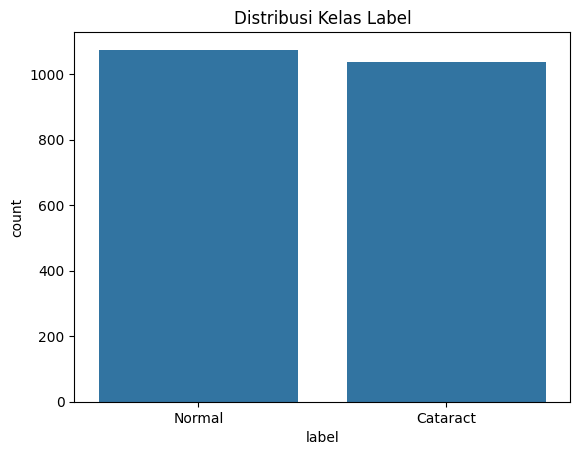

In [6]:
# Cek distribusi label (0 = Normal, 1 = Cataract)
sns.countplot(data=df, x='label')
plt.title('Distribusi Kelas Label')
plt.xticks([0, 1], ['Normal', 'Cataract'])
plt.show()

## Deteksi outlier

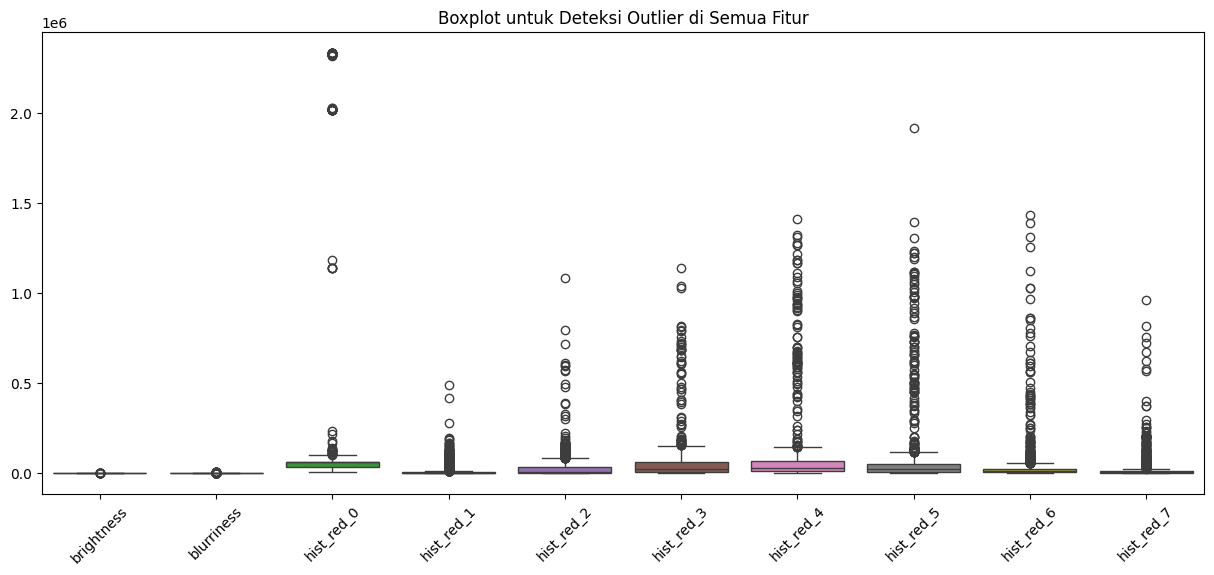

In [7]:
# Membuat boxplot semua fitur kecuali label
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.drop(columns=['label']))
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier di Semua Fitur")
plt.show()

#Preprocessing

In [8]:
# Pisahkan fitur dan label
X = df.drop(columns=['label'])
y = df['label']

## Scaling (StandardScaler)

In [9]:
# Scaling (karena ada outlier)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cek hasil scaling
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df.describe()


,brightness,blurriness,hist_red_0,hist_red_1,hist_red_2,hist_red_3,hist_red_4,hist_red_5,hist_red_6,hist_red_7
count,2.112000e+03,2.112000e+03,2.112000e+03,2112.000000,2.112000e+03,2.112000e+03,2.112000e+03,2112.000000,2.112000e+03,2.112000e+03
mean,-1.345725e-17,1.345725e-16,1.345725e-17,0.000000,2.018587e-17,4.373606e-17,1.345725e-17,0.000000,-3.364312e-17,2.691450e-17
std,1.000237e+00,1.000237e+00,1.000237e+00,1.000237,1.000237e+00,1.000237e+00,1.000237e+00,1.000237,1.000237e+00,1.000237e+00
min,-2.222123e+00,-1.234274e+00,-3.072979e-01,-0.327752,-4.225785e-01,-4.938459e-01,-4.152243e-01,-0.367444,-2.882697e-01,-2.978943e-01
25%,-7.397716e-01,-7.067357e-01,-2.489483e-01,-0.321744,-4.193941e-01,-4.712116e-01,-3.584674e-01,-0.328081,-2.733672e-01,-2.904530e-01
50%,-1.204027e-01,-2.272208e-01,-1.954707e-01,-0.317736,-3.834491e-01,-2.822878e-01,-2.285898e-01,-0.250386,-2.239481e-01,-2.526588e-01
75%,6.163995e-01,4.046560e-01,-1.911430e-01,-0.215185,1.259580e-01,1.803762e-01,-5.352740e-04,-0.052006,-7.264077e-02,-1.264764e-01
max,3.663372e+00,7.478804e+00,4.712425e+00,17.935546,1.816993e+01,1.195948e+01,8.933366e+00,12.054447,1.361343e+01,1.702928e+01


# Split Dataset

In [10]:
# Split ke data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


Jumlah data latih: 1689
Jumlah data uji: 423


# Modeling


In [11]:
# Contoh model yang akan dibandingkan
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train dan evaluasi model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Training
    y_pred = model.predict(X_test)  # Prediksi pada data test
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))




Logistic Regression Accuracy: 0.8558
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       215
           1       0.95      0.75      0.84       208

    accuracy                           0.86       423
   macro avg       0.87      0.85      0.85       423
weighted avg       0.87      0.86      0.85       423

Decision Tree Accuracy: 0.8463
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       215
           1       0.84      0.85      0.84       208

    accuracy                           0.85       423
   macro avg       0.85      0.85      0.85       423
weighted avg       0.85      0.85      0.85       423

Random Forest Accuracy: 0.8723
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       215
           1       0.92      0.81      0.86       208

    accuracy                           0.87       423
   macro avg       0.88      

## Visualisasi Hasil

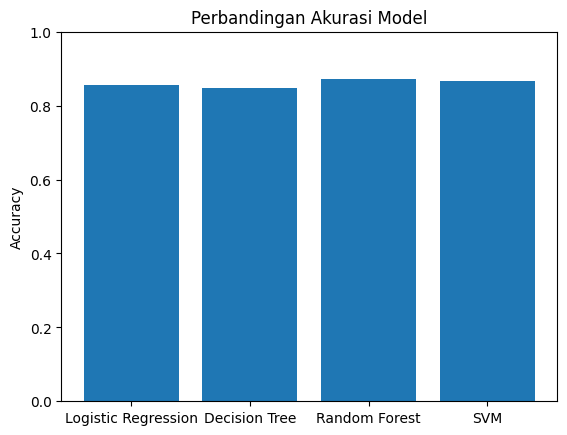

In [12]:
# Plot perbandingan akurasi
plt.bar(results.keys(), results.values())
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0,1)
plt.show()


##Insight Evaluasi Model Machine Learning

Dari hasil pengujian berbagai model klasifikasi pada data fitur katarak dan non-katarak, didapatkan beberapa insight sebagai berikut:

- **Random Forest** memberikan performa terbaik dengan akurasi **87.47%**, precision dan recall yang seimbang antara kelas katarak dan non-katarak, serta f1-score tertinggi yaitu sekitar 0.87.

- **SVM** memiliki akurasi sebesar **86.76%**, dengan recall kelas negatif (non-katarak) sangat tinggi (0.99), artinya model ini sangat baik mengenali data normal, namun sedikit menurun pada recall kelas positif (katarak).

- **Logistic Regression** mencapai akurasi **85.58%**, dengan performa recall yang cukup berbeda antara kelas: sangat baik mengenali non-katarak (0.96), tapi recall kelas katarak menurun (0.75). .

- **Decision Tree** menunjukkan akurasi **85.34%**, performa yang cukup seimbang antar kelas namun secara umum sedikit di bawah Random Forest dan SVM.

### Rekomendasi:
- Random Forest menjadi pilihan utama untuk model klasifikasi katarak karena performanya yang paling stabil dan seimbang.
- SVM bisa dipertimbangkan jika prioritasnya adalah meminimalkan false negative pada kelas normal.
- Logistic Regression dapat digunakan sebagai baseline model atau dipadukan dalam ensemble.
